[View in Colaboratory](https://colab.research.google.com/github/santoshb070/PythonAlgorithms_N_DS/blob/master/Logistic_Regression/LogisticRegression_Digit.ipynb)

# Logistic Regression

Loading Digit Data set that is part of scikit-Learn

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()


Now we got the dataset we need to work from sklearn so now we can check out what is present in the data so that we can move ahead and work on it 


In [8]:
print("Image data shape is : ",digits.data.shape)
print("Target data shape is : ", digits.target.shape)

Image data shape is :  (1797, 64)
Target data shape is :  (1797,)


From the above observations we have our data at a size of 1797
And also our target labels at 1797

Seems the data we had is okay.

The images here are of shape 8 * 8 that is equal to 64 pixels
This is the overview of the data that we are having.

# Showing the Images and Labels of the data

Doing like this we will be getting a good overview of the data that we are having.

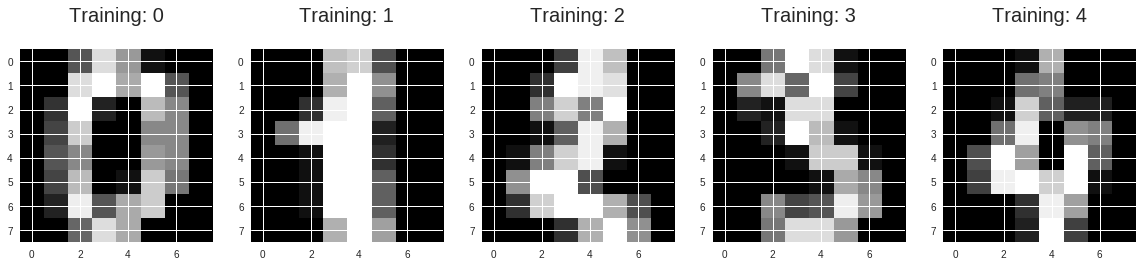

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20,4))

for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

 You cant find any data here, As the pixel sizes are much more for the image to fit in it properly.
 
 Existing images of different shape we are rehsaping them to a proper image format so that we can have a look using the matplotlib
 
 Finally we have given title to each of the image that has been plotted.

## Splitting data into testing and training datasets.

Since now we had a good understanding of what our data is we need to split our dataset using scikit learn a function which we will be importing to divide the data into training sets and testing sets.

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)

# Scikit-Learn Modelling Patter

### 1. Importing the model that we wanted to use

Since we are working on a dataset and inorder to train and test our model we need to import a machine learning model that we need to use for our dataset to understand.

In [0]:
from sklearn.linear_model import LogisticRegression

### 2. Make an instance of the Model

In [0]:
Lr = LogisticRegression()

### 3. Training the model on the data.
Model is learning the difference or relation between x(Digits) and y(Labels)

In [22]:
Lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 4. Predict the labels of new data

Returns a numpy array
Predict for one observation or an image and test

In [23]:
Lr.predict(x_test[0].reshape(1,-1))

array([2])

Now predict for multiple observations.

In [0]:
Lr.predict(x_test[0:10])

#Now make predictions on entire dataset
predictions = Lr.predict(x_test)

## Measuring Model Performance

Now that we have had our code ready and working fine we are going to see the model performance
We are going to make this simple by taking accuracy as our metric

We are now going to see the performance of our data in our test dataset.

Use Score method to check the accuracy of the model

In [30]:
accuracy = Lr.score(x_test,y_test)
print(accuracy)

0.9533333333333334


## Confusion Matrix (Digits Dataset)
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In this section, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrixes.



In [0]:
import numpy as np
import seaborn as sns
from sklearn import metrics

### Model 1 (Seaborn)

In [0]:
cm = metrics.confusion_matrix(y_test, predictions)

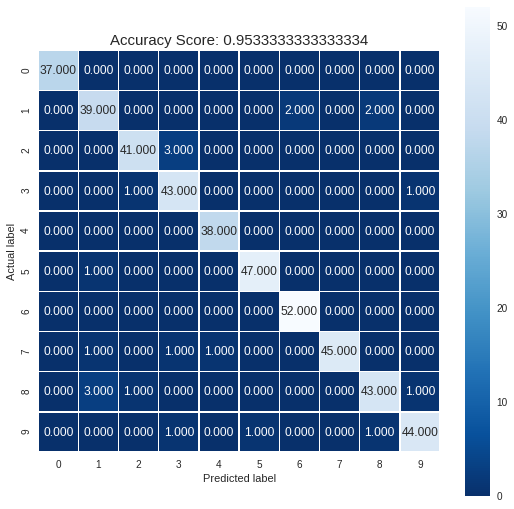

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();

### Method 2 (Matplotlib)

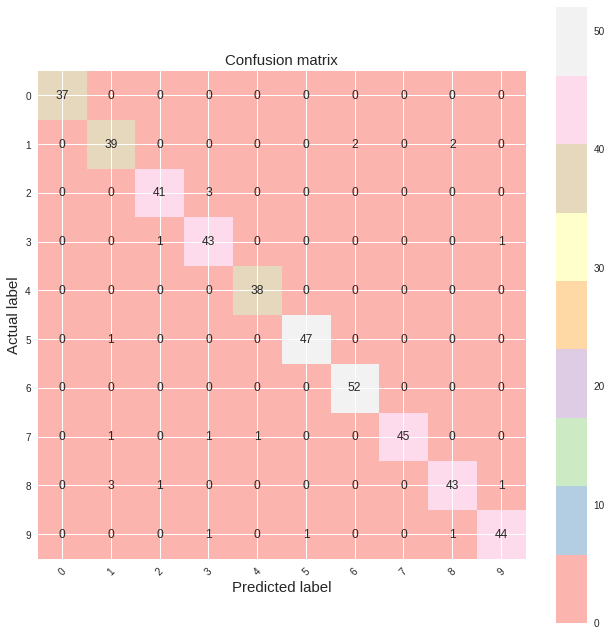

In [37]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
plt.savefig('toy_Digits_ConfusionMatplotlibCodementor.png')
#plt.show()